# COGS 108 Discussion Section W4

## DEADLINES


DUE DATES

- **Project Review** is due **this Friday**, Apr 26, 11:59PM

- **Quiz 3** is due **next Monday**, Apr 29, 11:59PM

- **Discussion lab 3** is due **next Monday**,  Apr 29, 11:59PM


COMING UP

- **Project Proposal** is due **next Friday**, May 3, 11:59PM (One submission per group)


   ## D3: Data Visualization and Exploratory Data Analysis

### Visualization Libraries: Pyplot and Seaborn

- `matplotlib` is a library for creating static, animated, and interactive visualizations in Python. Most of the Matplotlib utilities lies under the `pyplot` submodule, and are usually imported under the `plt` alias

- `seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Alias : `sns`

![Seaborn](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*RYrbI_N1aF7-3U3QgmxGVw.png)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Structures: Pandas Series and Dataframes

In [21]:
# importing pandas library
import pandas as pd

In [22]:
# creating pandas Series from list

author = ['Jitender', 'Purnima', 'Arpit', 'Jyoti']

auth_series = pd.Series(author)

auth_series

0    Jitender
1     Purnima
2       Arpit
3       Jyoti
dtype: object

We have just created two lists ‘author’ and article’ which have been passed to `Series()` functions to create two Series. 

In [23]:
author = ['Jitender', 'Purnima', 'Arpit', 'Jyoti']
article = [210, 211, 114, 178]

auth_series = pd.Series(author)
article_series = pd.Series(article)

frame = {'Author': auth_series, 'Article': article_series}

result = pd.DataFrame(frame)

result

,Author,Article
0,Jitender,210
1,Purnima,211
2,Arpit,114
3,Jyoti,178


After creating Series, we have created a dictionary and passed Series objects as values of the dictionary and keys of the dictionary will be served as columns of the dataframe.

### Analysis techniques

#### 1. value_counts()

`df['your_column'].value_count()`: returns the count of unique occurences in the specific column

Notes:
- `value_counts()` only works on pandas series, NOT dataframes (i.e. we can only do it for a single column)
- optional parameters include:
    - `normalize` (bool, default False)
    - `sort` (bool, default True): sort by frequency
    - `ascending` (bool, default False)
    - `bins` (int, optional): rather than count values, group them into half-open bins (only works with numerical data)
    - `dropna` (bool, default True)`

In [24]:
# we will use an example dataset from the seaborn library
df = sns.load_dataset('tips')

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [26]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [27]:
df['size'].value_counts() # index: all unique items that occured; value: the frequency

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [28]:
df['size'].value_counts().index

Index([2, 3, 4, 5, 1, 6], dtype='int64', name='size')

#### 2. Seaborn countplot()

<AxesSubplot:xlabel='sex', ylabel='count'>

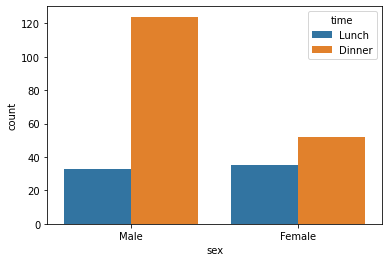

In [30]:
sns.countplot(x = 'sex',
              # y = ,
              hue = 'time',
             data = df)

#### 3. Separately apply functions with pd.groupby(..)

If we want to plot **proportions** in the y-axis instead of counts, we can create a new dataframe to store the proportions for each category.

We need to create a dataframe with three columns: one for sex, one for time, and one for proportion of respondent who worked for dinner within each sex.

Idea:
- use `df.groupby(...)` to separately apply an operation to each of the groups in the specific categoy

In [40]:
# for each group in 'sex', compute the mean
df.groupby('sex')['size'].mean()

/tmp/ipykernel_108/3614212764.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['size'].mean()


sex
Male      2.630573
Female    2.459770
Name: size, dtype: float64

In [42]:
# Try it on your own by completing the code

#prop_df = (df.groupby(...)['time']
#        .value_counts(normalize=True)
#        .rename(...)
#        .reset_index())